Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Aral Cimcim | k11720457 | 30.03.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; The Vanishing Gradient Problem (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer<br>
<b>Date:</b> 21-03-2023

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> Set the random seed with <code>u2.set_seed(17)</code> to enable reproducible results in all tasks that incorporate randomness (e.g., t-SNE, splitting data intro train and test sets, initializing weights of a neural network, running the model optimization with random batches, etc.). You must use <code>17</code> as seed.
</div>

In [3]:
# Import pre-defined utilities specific to this notebook.
import u2_utils as u2

# Import additional utilities needed in this notebook.
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from typing import Dict, Sequence

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u2.setup_jupyter()

# Check minimum versions.
u2.check_module_versions()

c:\Users\cimci\anaconda3\envs\hands_on_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Installed Python version: 3.9 (✓)
Installed numpy version: 1.24.2 (✓)
Installed pandas version: 1.5.3 (✓)
Installed PyTorch version: 1.13.1 (✓)
Installed scikit-learn version: 1.2.1 (✓)
Installed matplotlib version: 3.7.1 (✓)
Installed seaborn version: 0.12.2 (✓)


<h2>Definition of Auxiliaries</h2>

In this exercise, you will be working with a data set composed of images of various handwritten digits. It is probably <i>the</i> most prominent data set in the domain of machine learning: the <i>MNIST</i> data set. The data set distinguishes <i>ten</i> different classes, one for each digit (<i>zero</i> to <i>nine</i>). For curious minds, more information regarding this data set can be found at:

<center>
    <cite>LeCun, Y., 1998. The MNIST database of handwritten digits. <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>.</cite>
</center><br>
    
Before analyzing and tackling the vanishing gradient problem, the data sets needs to be inspected.

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Split the data set into a training set and a test set in a ratio of $4:1$.</li>
        <li>Visualize the MNIST training set in tabular form.</li>
    </ul>
</div>

In [4]:
### All code in this notebook is derived from the examples in U2.ipynb ###

# Set the seed to 17.
u2.set_seed(17)

# Load the MNIST dataset.
data_mnist = u2.load_mnist()

# Split the dataset into train and test sets.
data_mnist_train, data_mnist_test = u2.split_data(data_mnist, test_size= 1.0 / 5.0)

# Check the sizes of the train and test sets.
print(f'Full data set is of size: {data_mnist.shape[0]:>5}')
print(f'Training subset is of size: {data_mnist_train.shape[0]:>5}')
print(f'Testing subset is of size: {data_mnist_test.shape[0]:>5}')

# Visualize the MNIST training set in tabular form.
data_mnist_train


Full data set is of size: 70000
Training subset is of size: 56000
Testing subset is of size: 14000


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
68238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
58080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
54385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
39832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
25631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
42297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
34959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b><br>
    Answer the following questions:
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many samples does the training and the test set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>digit</i>)?</li>
    </ul>
</div>

70000 samples for the whole data set

56000 samples for training, 14000 samples for testing

784 features



<div class="alert alert-warning">
    <b>Exercise 1.3. [6 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the MNIST training set using <i>t-SNE</i>. To avoid long computation times, select a subset of the training data with $n=3000$ samples, and then perform <i>PCA</i> with $40$ components first. Afterwards, apply t-SNE with $2$ components on this PCA data (choose the perplexity yourself).</li>
        <li>Visualize the t-SNE downprojection.</li>
    </ul>
</div>

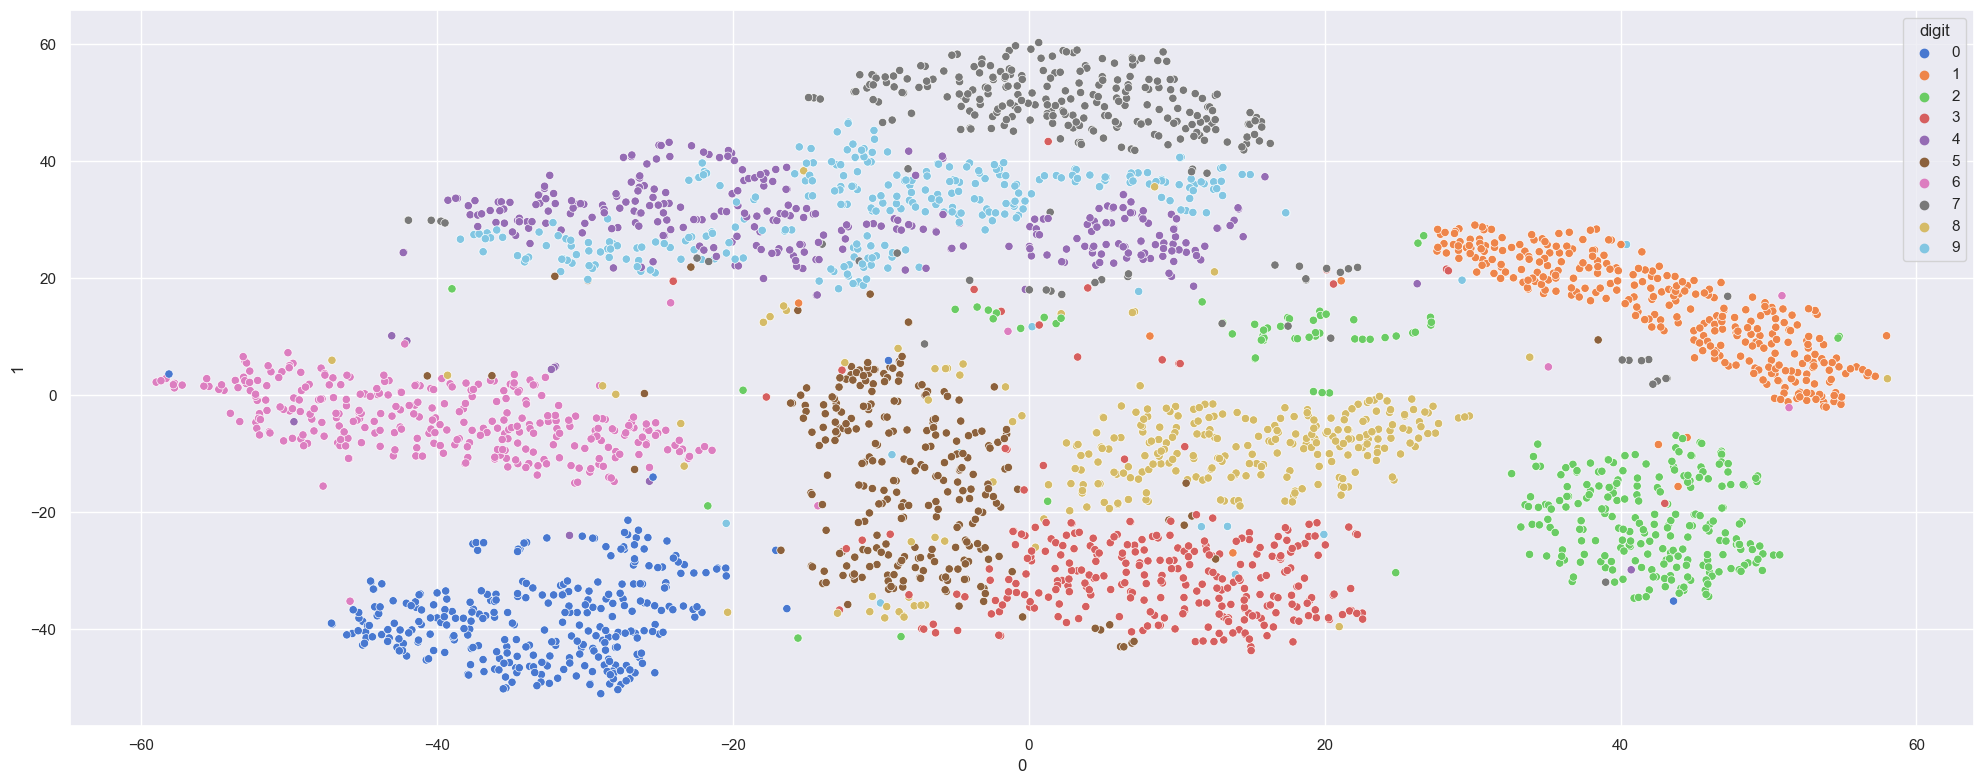

In [5]:
# Set the seed to 17.
u2.set_seed(17)

# Select a subset of the training set.
data_mnist_train_subset = data_mnist_train.sample(3000)

# Apply PCA with 40 components.
data_mnist_train_PCA = u2.apply_pca(n_components=40, data=data_mnist_train_subset)

# Apply t-SNE with 2 components.
data_mnist_train_tSNE = u2.apply_tsne(n_components=2, data=data_mnist_train_PCA, perplexity=40)

# Visualize the t-SNE downprojection.
u2.plot_points_2d(data=data_mnist_train_tSNE, targets=data_mnist_train_subset['digit'], figsize=(20, 8))


<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Comment on the separability of the MNIST training (sub)set with respect to the downprojection.</li>
    </ul>
</div>

Clusters of 10 digits are observable, they are not well-separated, e.g. there are outliers. It seems that with increased perplexity, clusters become denser and more local after dimensionality reduction.

<div class="alert alert-warning">
    <b>Exercise 1.5. [2 Points]</b>
    <ul>
        <li>Given the results above, do you think that there is some model that can classify the data set (decently) well? State your reasoning.</li>
    </ul>
</div>

A convolutional neural network would classify the data set well since it would be able to observe parts of the digits in small areas by weight sharing without human supervision.

<h2>Training of a Neural Network</h2>

Loading and inspecting a new data set is always an exciting moment, but even more exciting is the implementation of a corresponding neural network and applying it to said data set. In this section, you will thus have to implement and train an appropriate neural network model and revisit your knowledge about the <i>forward</i> as well as the <i>backward</i> pass.

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [4]:
def train_and_evaluate(model: torch.nn.Module, optimizer: torch.optim.Optimizer, num_epochs: int,
                       loader_train: torch.utils.data.DataLoader, loader_test: torch.utils.data.DataLoader,
                       device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')) -> None:
    """
    Auxiliary function for training and evaluating a corresponding model.
    
    :param model: model instance to train and evaluate
    :param optimizer: optimizer to use for model training
    :param num_epochs: amount of epochs for model training
    :param loader_train: data loader supplying the training samples
    :param loader_test: data loader supplying the test samples
    :param device: device to use for model training and evaluation
    """
    model.to(device)
    
    for epoch in range(num_epochs):
        # Train model instance for one epoch.
        u2.train_network(
            model=model,
            data_loader=loader_train,
            device=device,
            optimizer=optimizer
        )

        # Evaluate current model instance.
        performance = u2.test_network(
            model=model,
            data_loader=loader_train,
            device=device
        )

        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
              f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

    # Evaluate final model on test data set.
    performance = u2.test_network(model=model, data_loader=loader_test, device=device)
    print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

<div class="alert alert-warning">
    <b>Exercise 2.1. [4 Points]</b>
    <ul>
        <li>Create a corresponding <code>TensorDataset</code> for the training as well as the test set.</li>
        <li>Wrap the previously defined <code>TensorDataset</code> instances in separate <code>DataLoader</code> instances with a batch size of $80$ (shuffle the training data set).</li>
        <li>Scale the features of the training as well as test set by a factor of $\frac{1}{255}$, i.e., normalize the data to range $[0; 1]$</li>
    </ul>
</div>

In [5]:
# Create a TensorDataset for training and testing.
# Wrap the instances as DataLoaders for batch size 80.
# Scale the features of the train and test set by 1/255.

# Set the seed to 17.
u2.set_seed(17)

# 1/255 --> [0; 1] for training.
loader_mnist_train = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_train.drop(columns=['digit']).values / 255),
        torch.from_numpy(data_mnist_train['digit'].values)), batch_size=80, shuffle=True)

# 1/255 --> [0; 1] for testing.
loader_mnist_test = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_test.drop(columns=['digit']).values / 255),
        torch.from_numpy(data_mnist_test['digit'].values)), batch_size=80, shuffle=False)


<div class="alert alert-warning">
    <b>Exercise 2.2. [6 Points]</b>
    <ul>
        <li>Implement a class <code>FNN_0</code> with the following architecture (square weight matrix means that the input size is equal to the output size):</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28 = 784$</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>2</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>4</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>5</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>6</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>7</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>8</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>9</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>10</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>11</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [18]:
# Class FNN_0.

class FNN_0(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # Pos 1
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.ac1 = torch.nn.Sigmoid()
        # Pos 3
        self.fc2 = torch.nn.Linear(512, 512)
        self.ac2 = torch.nn.Sigmoid()
        # Pos 5
        self.fc3 = torch.nn.Linear(512, 512)
        self.ac3 = torch.nn.Sigmoid()
        # Pos 7
        self.fc4 = torch.nn.Linear(512, 512)
        self.ac4 = torch.nn.Sigmoid()
        # Pos 9
        self.fc5 = torch.nn.Linear(512, 512)
        self.ac5 = torch.nn.Sigmoid()
        # Pos 11
        self.fc6 = torch.nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        return self.fc6(x)

FNN_0()

FNN_0(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac3): Sigmoid()
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac5): Sigmoid()
  (fc6): Linear(in_features=512, out_features=10, bias=True)
)

<div class="alert alert-warning">
    <b>Exercise 2.3. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_0</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.05$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [20]:
# Set the seed to 17.
u2.set_seed(17)

# Create a FNN_0 instance and a corresponding SGD optimizer with learning rate 0.05.
feed_forward_model = FNN_0()
optimizer = torch.optim.SGD(feed_forward_model.parameters(), lr=5e-2)

# Print the model architecture.
print(feed_forward_model)


FNN_0(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac3): Sigmoid()
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac5): Sigmoid()
  (fc6): Linear(in_features=512, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 2.4. [2 Points]</b>
    <ul>
        <li>Train an <code>FNN_0</code> network for $6$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [21]:
# Set the seed to 17.
u2.set_seed(17)

train_and_evaluate(
    model=feed_forward_model,
    optimizer=optimizer,
    num_epochs=6,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test
)


Epoch: 1 / Train loss: 0.0291 / Train accuracy: 0.0971
Epoch: 2 / Train loss: 0.0290 / Train accuracy: 0.0903
Epoch: 3 / Train loss: 0.0289 / Train accuracy: 0.0994
Epoch: 4 / Train loss: 0.0290 / Train accuracy: 0.1126
Epoch: 5 / Train loss: 0.0288 / Train accuracy: 0.1039
Epoch: 6 / Train loss: 0.0288 / Train accuracy: 0.0977

Test loss: 0.0288 / Test accuracy: 0.1004


<div class="alert alert-warning">
    <b>Exercise 2.5. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

The training loss stays almost the same at each epoch, the accuracy is very low.

<div class="alert alert-warning">
    <b>Exercise 2.6. [3 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>forward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

\begin{equation}
\hat{y} = g\left(h^{(5)}(h^{(4)}(h^{(3)}(h^{(2)}(h^{(1)}(\mathbf{x};\mathbf{W}_1);\mathbf{W}_2);\mathbf{W}_3);\mathbf{W}_4;)\mathbf{W}_5;)\mathbf{W}_6)\right)
\end{equation}

<div class="alert alert-warning">
    <b>Exercise 2.7. [4 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>backward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

\begin{align*}
\mathbf{W}_6 & \leftarrow \mathbf{W}_6 - \eta \frac{\partial L}{\partial \mathbf{W}_6} \\
\mathbf{W}_5 & \leftarrow \mathbf{W}_5 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial \mathbf{W}_5} \\
\mathbf{W}_4 & \leftarrow \mathbf{W}_4 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial \mathbf{W}_4} \\
\mathbf{W}_3 & \leftarrow \mathbf{W}_3 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial h^{(3)}}\frac{\partial h^{(3)}}{\partial \mathbf{W}_3} \\
\mathbf{W}_2 & \leftarrow \mathbf{W}_2 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial h^{(3)}}\frac{\partial h^{(3)}}{\partial h^{(2)}}\frac{\partial h^{(2)}}{\partial \mathbf{W}_2} \\
\mathbf{W}_1 & \leftarrow \mathbf{W}_1 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial h^{(3)}}\frac{\partial h^{(3)}}{\partial h^{(2)}}\frac{\partial h^{(2)}}{\partial h^{(1)}}\frac{\partial h^{(1)}}{\partial \mathbf{W}_1}
\end{align*}

<h2>Analyzing Gradients</h2>

Is the performance problem of <code>FNN_0</code> related to the vanishing gradient problem? This is exactly the point you're going to figure out in this exercise. As a first step, the gradients of a freshly initialized model need to be collected and analyzed. Afterwards, in case of a vanishing gradient problem, countermeasures must be taken.</p>

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [22]:
def collect_gradients(model: torch.nn.Module, loader: torch.utils.data.DataLoader,
                      device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')) -> Sequence[Dict[str, np.array]]:
    """
    Auxiliary function for collecting gradients of a corresponding model.
    
    :param model: model instance to be used for collecting gradients
    :param loader: data loader supplying the samples used for collecting gradients
    :param device: device to use for gradient collection
    :return: sequence of parameter names and gradients, averaged over all parameter elements
    """
    model.to(device)
    model_state = model.training
    model.train()
    model.zero_grad()
    
    # Iterating over the data set and computing the corresponding gradients.
    # Since we are only interested in the gradients, we can skip the optimization step.
    gradients = {}
    criterion = torch.nn.CrossEntropyLoss()
    
    for data, target in loader:
        data, target = data.float().to(device), target.long().to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
    
        # Collecting the (averaged absolute) gradients from the current model.
        for name, parameter in model.named_parameters():
            if "weight" in name and parameter.grad is not None:
                gradients.setdefault(name, []).append(parameter.grad.view(-1).abs().mean().item())
        model.zero_grad()
    
    # Reset model state and return collected gradients.
    model.train(mode=model_state)
    return gradients

<div class="alert alert-warning">
    <b>Exercise 3.1. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_0</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [23]:
models = []
for model_class in [FNN_0]:
    # Set the seed to 17.
    u2.set_seed(17)
    
    # Append to models list.
    models.append(model_class())

# Collect gradients for FNN_0.
gradients = [(model, collect_gradients(model=model, loader=loader_mnist_train)) for model in models]

<div class="alert alert-warning">
    <b>Exercise 3.2. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly.</li>
    </ul>
</div>

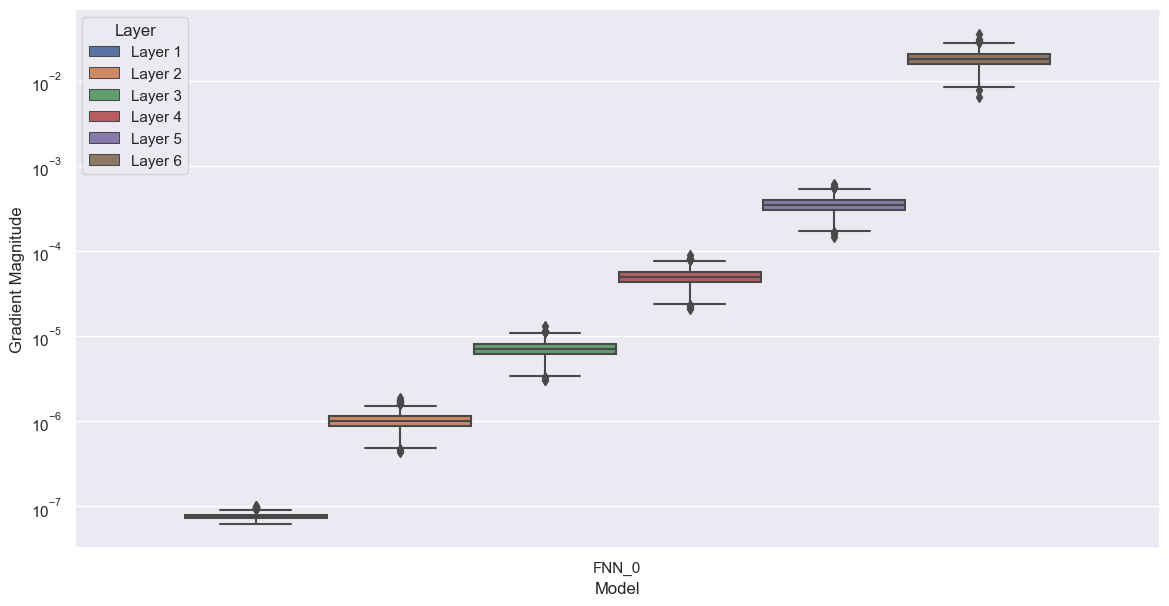

In [24]:
# Prepare the gradients for plotting.
gradient_dfs = []
for model, gradient in gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data["Model"] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Concatenate all gradients.
gradients_df = pd.concat(gradient_dfs)

# Set the plot parameters.
fig, ax = plt.subplots(figsize=(14, 7))
ax.set(yscale='log')

# Plot the gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.3. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

The Sigmoid activation is causing vanishing gradients in the hidden layers with increasing layer size.

<div class="alert alert-warning">
    <b>Exercise 3.4. [6 Points]</b>
    <ul>
        <li>Assume a vanishing gradient. Apply the countermeasure presented during the accompanying exercise by implementing a corresponding <code>FNN_1</code> network.</li>
    </ul>
</div>

In [25]:
# Class FNN_1 with ReLU activations.

class FNN_1(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # Pos 1
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.ac1 = torch.nn.ReLU()
        # Pos 3
        self.fc2 = torch.nn.Linear(512, 512)
        self.ac2 = torch.nn.ReLU()
        # Pos 5
        self.fc3 = torch.nn.Linear(512, 512)
        self.ac3 = torch.nn.ReLU()
        # Pos 7
        self.fc4 = torch.nn.Linear(512, 512)
        self.ac4 = torch.nn.ReLU()
        # Pos 9
        self.fc5 = torch.nn.Linear(512, 512)
        self.ac5 = torch.nn.ReLU()
        # Pos 11
        self.fc6 = torch.nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        return self.fc6(x)

FNN_1()

FNN_1(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (ac2): ReLU()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac3): ReLU()
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (ac4): ReLU()
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac5): ReLU()
  (fc6): Linear(in_features=512, out_features=10, bias=True)
)

<div class="alert alert-warning">
    <b>Exercise 3.5. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_1</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.05$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [27]:
# Set the seed to 17.
u2.set_seed(17)

# Create a FNN_0 instance and a corresponding SGD optimizer with learning rate 0.05.
feed_forward_model_2 = FNN_1()
optimizer = torch.optim.SGD(feed_forward_model_2.parameters(), lr=5e-2)

# Print the model architecture.
print(feed_forward_model_2)


FNN_1(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (ac2): ReLU()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac3): ReLU()
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (ac4): ReLU()
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac5): ReLU()
  (fc6): Linear(in_features=512, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 3.6. [3 Points]</b>
    <ul>
        <li>Train an <code>FNN_1</code> network for $6$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [28]:
# Set the seed to 17.
u2.set_seed(17)

train_and_evaluate(
    model=feed_forward_model_2,
    optimizer=optimizer,
    num_epochs=6,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test
)


Epoch: 1 / Train loss: 0.0097 / Train accuracy: 0.7648
Epoch: 2 / Train loss: 0.0033 / Train accuracy: 0.9245
Epoch: 3 / Train loss: 0.0020 / Train accuracy: 0.9529
Epoch: 4 / Train loss: 0.0012 / Train accuracy: 0.9732
Epoch: 5 / Train loss: 0.0009 / Train accuracy: 0.9779
Epoch: 6 / Train loss: 0.0008 / Train accuracy: 0.9815

Test loss: 0.0012 / Test accuracy: 0.9691


<div class="alert alert-warning">
    <b>Exercise 3.7. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

A very significant decrease in training loss and a big increase in training accuracy.

<div class="alert alert-warning">
    <b>Exercise 3.8. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_1</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [29]:
models = []
for model_class in [FNN_0, FNN_1]:

    # Set the seed to 17.
    u2.set_seed(17)
    
    # Append FNN_0 & FNN_1 to models list.
    models.append(model_class())

gradients = [(model, collect_gradients(model=model, loader=loader_mnist_train)) for model in models]

<div class="alert alert-warning">
    <b>Exercise 3.9. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly. Include the gradient visualization of <code>FNN_0</code> to enable a direct comparison.</li>
    </ul>
</div>

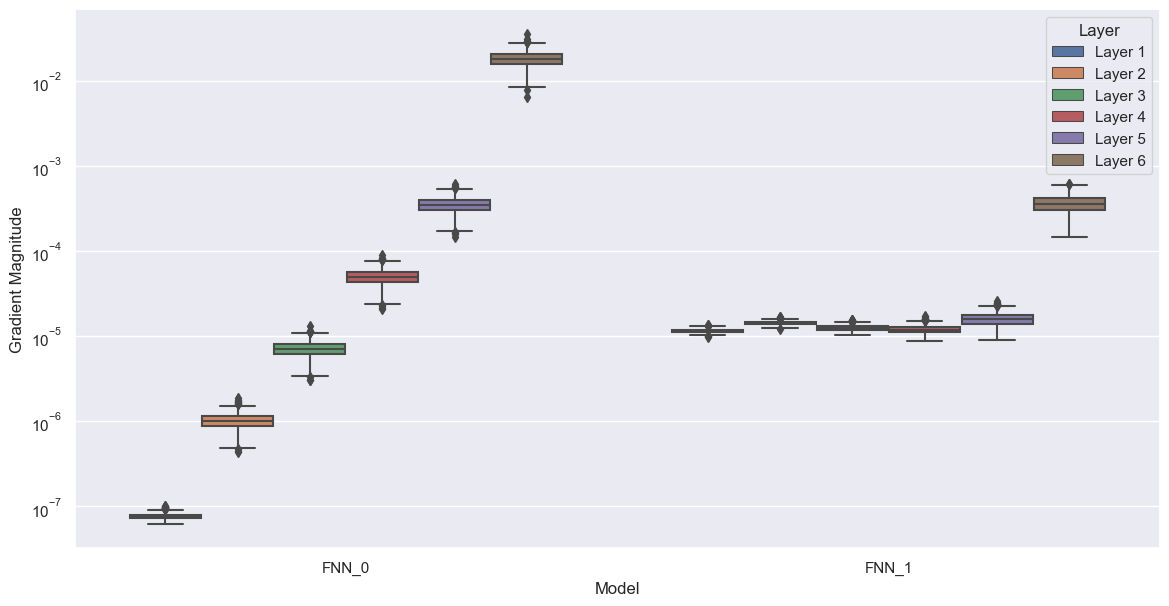

In [30]:
# Prepare the gradients for plotting.
gradient_dfs = []
for model, gradient in gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data["Model"] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Concatenate all gradients.
gradients_df = pd.concat(gradient_dfs)

# Set the plot parameters.
fig, ax = plt.subplots(figsize=(14, 7))
ax.set(yscale='log')

# Plot the gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.10. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

The problem with vanishing gradients seems to be solved by changing the activation function, the gradient magnitude is reduced.

<h2>Deriving Derivatives</h2>

It is already known from the lecture as well as the exercise that <i>activation</i> functions are the primary culprit of the <i>Vanishing Gradient Problem</i>. Hence, it is important to know <i>how</i> the chosen activation functions activate the input and consequently what the <i>derivative</i> is.

<div class="alert alert-warning">
    <b>Exercise 4.1. [4 Points]</b><br>
    Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardsigmoid.html#torch.nn.Hardsigmoid">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>hardsigmoid</code> activation function as it was done for <code>relu</code> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <code>hardsigmoid</code> activation function accordingly.</li>
    </ul>
</div>

In [44]:
# Define the hard sigmoid function.
def hard_sigmoid(x: float) -> float:

    if x <= -3.0:
        return 0
    
    elif x > 3.0:
        return 1.0
    
    else:
        return x / 6.0 + 0.5

# Define the derivative of the hard sigmoid function.
def hard_sigmoid_d(x: float) -> float:

    if -3.0 <= x <= 3.0:
        return 0.2
    else:
        return 0.0

# Check the value range of the sigmoid function and its derivative.
for x in [-10.0, 0.0, 10.0]:
    print(f'sigmoid({x:>5}): {hard_sigmoid(x):.4f} | sigmoid\'({x:>5}): {hard_sigmoid_d(x):.4f}')


sigmoid(-10.0): 0.0000 | sigmoid'(-10.0): 0.0000
sigmoid(  0.0): 0.5000 | sigmoid'(  0.0): 0.2000
sigmoid( 10.0): 1.0000 | sigmoid'( 10.0): 0.0000


<div class="alert alert-warning">
    <b>Exercise 4.2. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>hardsigmoid</code> activation function as well as its derivative.</li>
        <li>Plot the <code>hardsigmoid</code> activation function including its derivative for the input range $[-8; 8]$.</li>
    </ul>
</div>

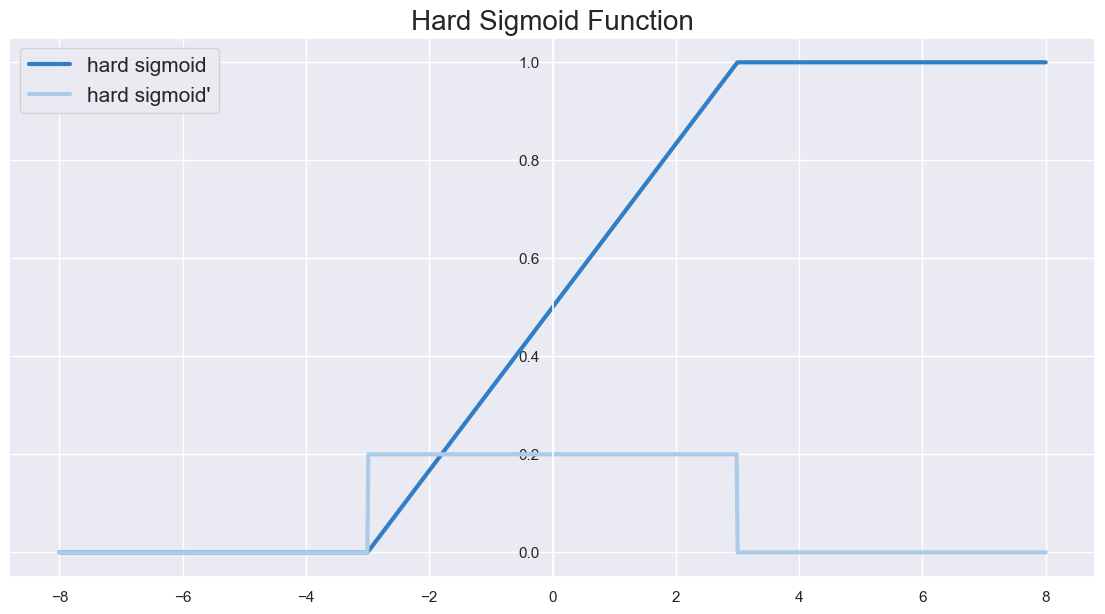

In [45]:
# Plot the hard sigmoid function and its derivative.
def plot_sigmoid_with_derivative(x_min: float = -8.0, x_max: float = 8.0, granularity: int = 1000) -> None:

    data = np.linspace(x_min, x_max, granularity)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(hard_sigmoid, data)), color='#307EC7', linewidth=3, label='hard sigmoid')
    plt.plot(data, tuple(map(hard_sigmoid_d, data)), color='#accbe8', linewidth=3, label="hard sigmoid'")
    plt.title('Hard Sigmoid Function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot the 2 functions.
plot_sigmoid_with_derivative()

<div class="alert alert-warning">
    <b>Exercise 4.3. [4 Points]</b><br>
    Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>leaky_relu</code> activation function as it was done for <code>relu</code> in the exercise. Use a <i>negative slope</i> of $0.25$.</li>
        <li>Implement the <i>derivative</i> of the <code>leaky_relu</code> activation function accordingly.</li>
    </ul>
</div>

In [58]:
# Define the leaky_relu activation function.
def leaky_relu(x: float) -> float:
    if x >= 0.0:
        return x
    else:
        return x * 0.25
    
# Define the derivative of the leaky_relu activation function.
def leaky_relu_d(x: float) -> float:
    if x > 0.0:
        return 1.0
    else:
        return 0.25
        
# Check the value range of the leaky_relu function and its derivative.
for x in [-10, 0.0, 10]:
    print(f'leaky relu({x:>5}): {leaky_relu(x):7.4f} | leaky relu\'({x:>5}): {leaky_relu_d(x):.4f}')


leaky relu(  -10): -2.5000 | leaky relu'(  -10): 0.2500
leaky relu(  0.0):  0.0000 | leaky relu'(  0.0): 0.2500
leaky relu(   10): 10.0000 | leaky relu'(   10): 1.0000


<div class="alert alert-warning">
    <b>Exercise 4.4. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>leaky_relu</code> activation function as well as its derivative.</li>
        <li>Plot the <code>leaky_relu</code> activation function including its derivative for the input range $[-8; 8]$.</li>
    </ul>
</div>

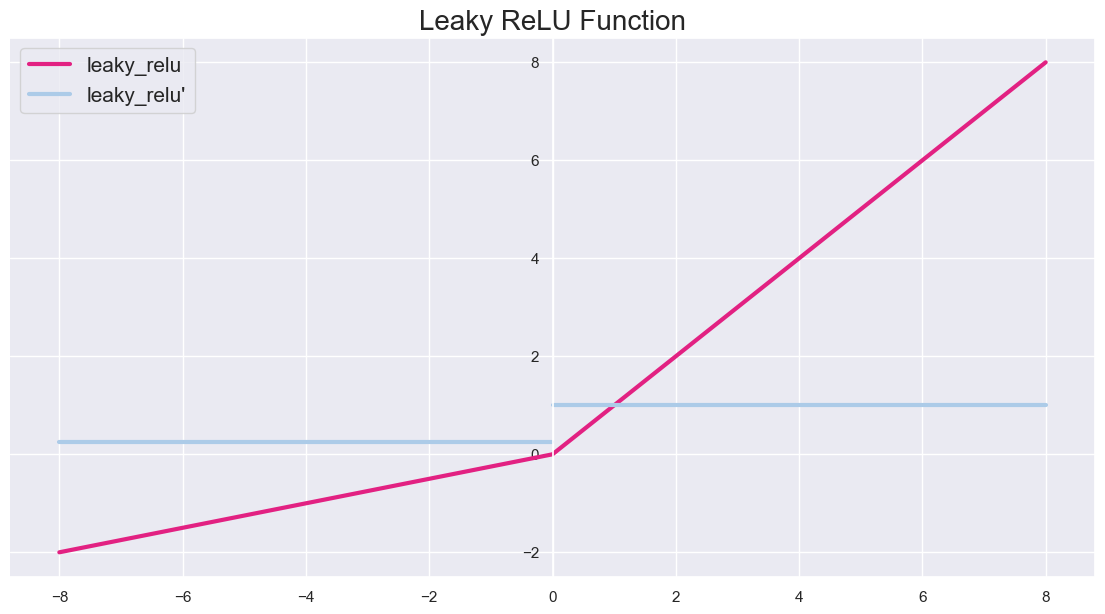

In [59]:
def plot_leaky_relu_with_derivative(x_min: float = -8.0, x_max: float = 8.0, granularity: int = 1000) -> None:

    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(leaky_relu, data)), color='#e22182', linewidth=3, label='leaky_relu')

    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(leaky_relu_d, data_neg)), color='#accbe8', linewidth=3, label="leaky_relu'")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(leaky_relu_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('Leaky ReLU Function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot ReLU with derivative.
plot_leaky_relu_with_derivative()

<div class="alert alert-warning">
    <b>Exercise 4.5. [2 Points]</b>
    <ul>
        <li>Which of these two activation functions from above do you think is susceptible to the vanishing gradient problem? Explain your decision.</li>
    </ul>
</div>

Leaky ReLU, the values which are less than 0 are converted to small positive numbers better than the Hard Sigmoid since the derivative is 1 in the positive part / a small number in the negative part.

<div class="alert alert-warning">
    <b>Exercise 4.6. [6 Points]</b>
    <ul>
        <li>Create the same network architecture as <code>FNN_0</code> but replace its activation function with the one you selected above in <b>Exercise 4.5.</b> (the one that is susceptible to the vanishing gradient problem). Name the new network <code>FNN_2</code>.</li>
    </ul>
</div>

In [36]:
# Class FNN_2 with Leaky ReLU
class FNN_2(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # Pos 1
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.ac1 = torch.nn.LeakyReLU()
        # Pos 3
        self.fc2 = torch.nn.Linear(512, 512)
        self.ac2 = torch.nn.LeakyReLU()
        # Pos 5
        self.fc3 = torch.nn.Linear(512, 512)
        self.ac3 = torch.nn.LeakyReLU()
        # Pos 7
        self.fc4 = torch.nn.Linear(512, 512)
        self.ac4 = torch.nn.LeakyReLU()
        # Pos 9
        self.fc5 = torch.nn.Linear(512, 512)
        self.ac5 = torch.nn.LeakyReLU()
        # Pos 11
        self.fc6 = torch.nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        return self.fc6(x)

FNN_2()

FNN_2(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (ac2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac3): LeakyReLU(negative_slope=0.01)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (ac4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac5): LeakyReLU(negative_slope=0.01)
  (fc6): Linear(in_features=512, out_features=10, bias=True)
)

<div class="alert alert-warning">
    <b>Exercise 4.7. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_2</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [37]:
models = []
for model_class in [FNN_0, FNN_2]:
    # Set random seed to 17.
    u2.set_seed(17)
    
    # Append to the list of models.
    models.append(model_class())

gradients = [(model, collect_gradients(model=model, loader=loader_mnist_train)) for model in models]

<div class="alert alert-warning">
    <b>Exercise 4.8. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly. Include the gradient visualization of <code>FNN_0</code> to enable a direct comparison.</li>
    </ul>
</div>

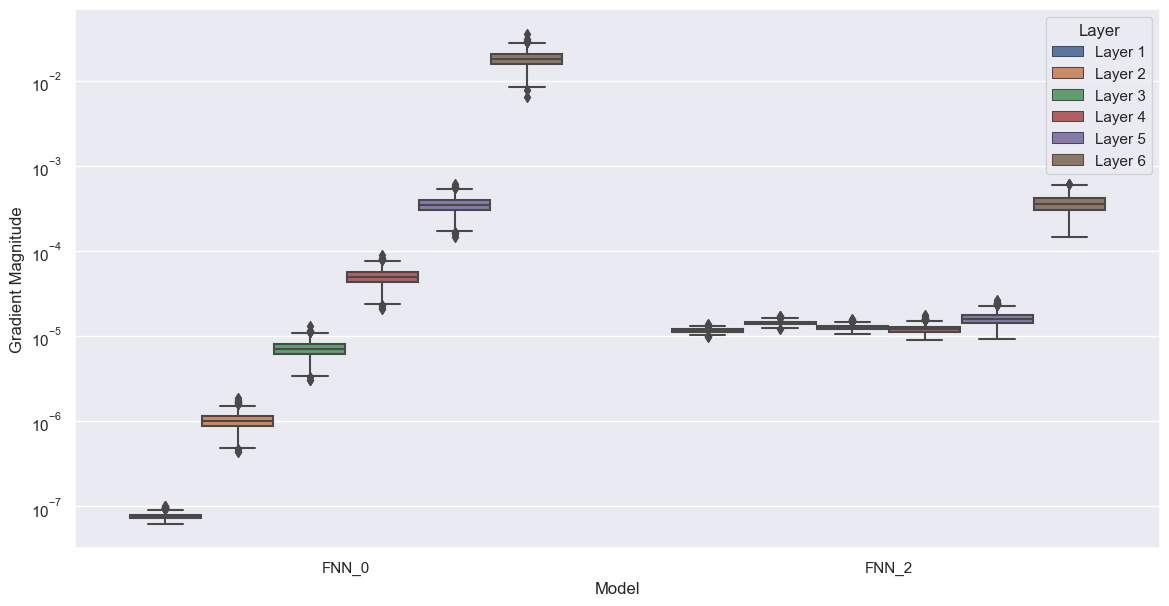

In [38]:
# Prepare the gradients for plotting.
gradient_dfs = []
for model, gradient in gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data["Model"] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Concatenate the gradients into 1 dataframe.
gradients_df = pd.concat(gradient_dfs)

# Define the figure parameters.
fig, ax = plt.subplots(figsize=(14, 7))
ax.set(yscale='log')

# Plot the gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 4.9. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

Leaky ReLU is less saturated at 0, it wouldn't be possible to have a vanishing gradient with Leaky ReLU.